Data shape: (5000, 3773)
Attributes: {'dt_s': np.float64(0.01), 'end_idx': np.int64(5800), 'event_id': 'ci39835791', 'start_idx': np.int64(2027), 'y_max': np.int64(4999), 'y_min': np.int64(0)}


Filtered with 2–10 Hz bandpass, clipped at 95.0th percentile.


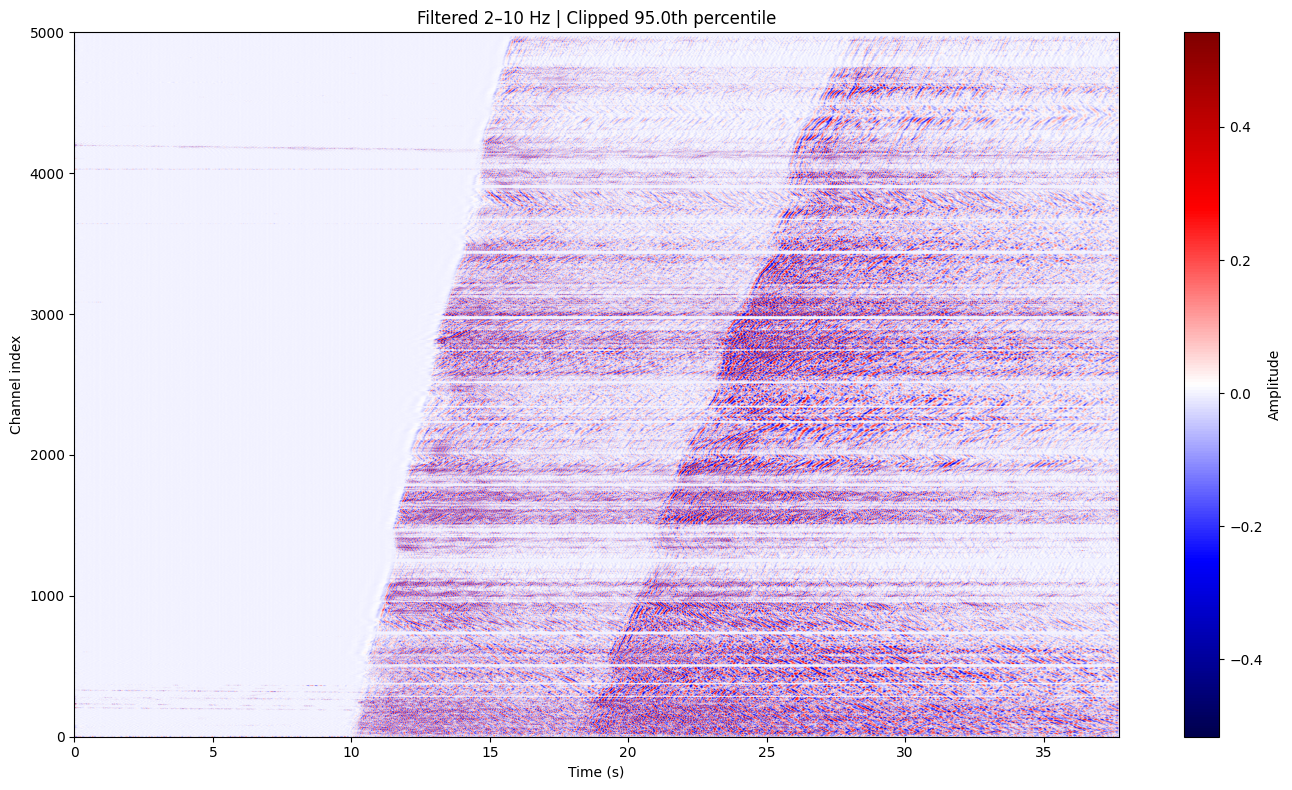

In [31]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfiltfilt

h5_path = '/home/joe/seismic-edge-detect/models/TEED/SEISMIC/ci39835791.h5'

with h5py.File(h5_path, 'r') as f:
    data = f['data'][...]
    attrs = dict(f['data'].attrs)

print(f"Data shape: {data.shape}")
print(f"Attributes: {attrs}")

dt = float(attrs.get('dt_s', 0.005))
fs = 1.0 / dt

# Create time array
t = np.arange(data.shape[1]) * dt

# Bandpass filter
def bandpass(data, fs, lowcut=2, highcut=10, order=4):
    sos = butter(order, [lowcut, highcut], btype="band", fs=fs, output="sos")
    return sosfiltfilt(sos, data, axis=1)

clip_percent = 95.0
band = [2, 10]

clip_val = np.percentile(np.abs(data), clip_percent)
data_clip = np.clip(data, -clip_val, clip_val)
data_filt = bandpass(data_clip, fs, *band)

print(f"Filtered with {band[0]}–{band[1]} Hz bandpass, clipped at {clip_percent}th percentile.")

# Plot filtered data
plt.figure(figsize=(14, 8))
plt.imshow(
    data_filt,
    aspect="auto",
    cmap="seismic",
    origin="lower",
    extent=[t[0], t[-1], 0, data.shape[0]],
)
plt.title(f"Filtered {band[0]}–{band[1]} Hz | Clipped {clip_percent}th percentile")
plt.xlabel("Time (s)")
plt.ylabel("Channel index")
plt.colorbar(label="Amplitude")
plt.tight_layout()
plt.show()